#1. 데이터에 대한 이해(Data Definition)

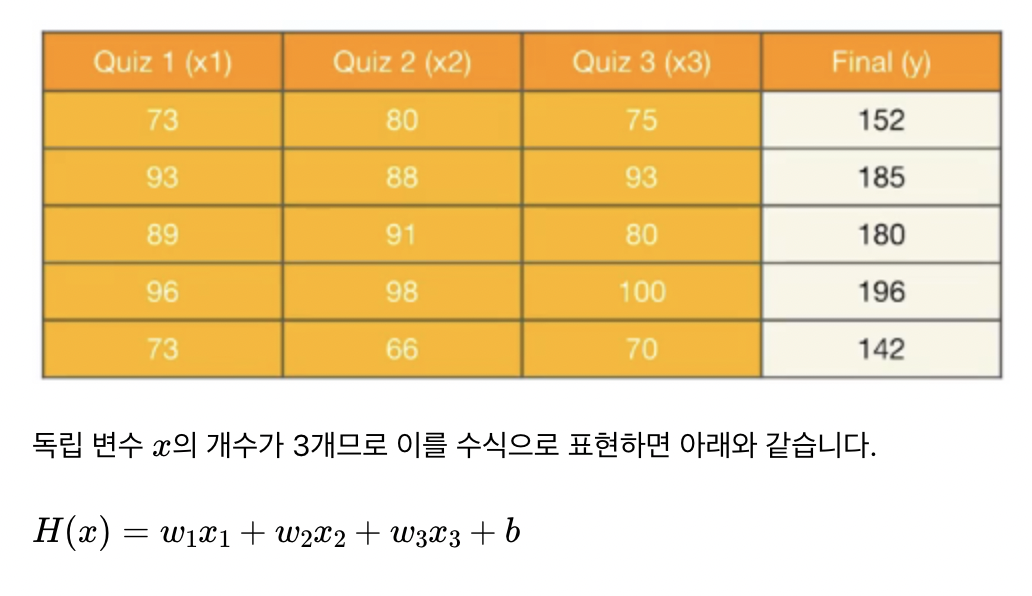

#2. 파이토치로 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [5]:
#데이터
x1_train = torch.FloatTensor([[73],[93],[89],[96],[73]])
x2_train = torch.FloatTensor([[80],[88],[91],[98],[66]])
x3_train = torch.FloatTensor([[75],[93],[90],[100],[70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [7]:
#가중치와 편향
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
#옵티마이저
optimizer = optim.SGD([w1,w2,w3,b], lr = 1e-5)

nb_epochs =1000
for epoch in range(nb_epochs+1):

    #가설
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    #cost
    cost = torch.mean((y_train - hypothesis)**2)

    #cost로 H(x)계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


#3. 벡터와 행렬 연산으로 바꾸기

일일이 x값과 가중치를 선언해주지 않고 행렬 곱셈 연산(또는 벡터의 내적)을 사용한다.

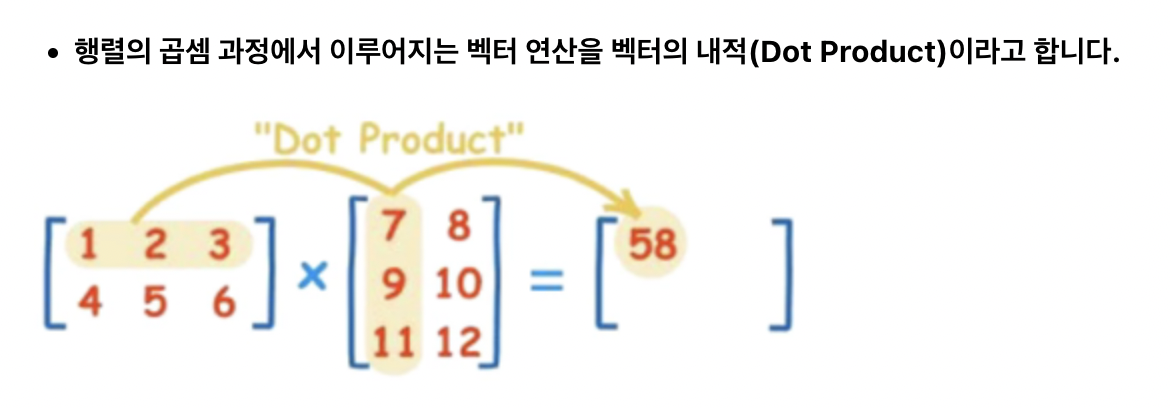

H(x) = XW + B

#4. 행렬 연산을 고려하여 파이토치로 구현하기

In [10]:
x_train = torch.FloatTensor([[73,  80,  75], 
                            [93,  88,  93], 
                            [89,  91,  80], 
                            [96,  98,  100],   
                            [73,  66,  70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [11]:
x_train.shape

torch.Size([5, 3])

In [12]:
y_train.shape

torch.Size([5, 1])

In [15]:
#가중치와 편향
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros((1,), requires_grad=True)

In [16]:
hypothesis = x_train.matmul(W) + b #matmul -> 행렬연산

In [17]:
x_train = torch.FloatTensor([[73,  80,  75], 
                            [93,  88,  93], 
                            [89,  91,  80], 
                            [96,  98,  100],   
                            [73,  66,  70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros((1,), requires_grad=True)

#optimizer
optimizer = optim.SGD([W,b], lr=1e-5)
nb_epochs = 20
for epoch in range(nb_epochs+1):
    #H(x)계산
    hypothesis = x_train.matmul(W) + b

    #cost 계산
    cost = torch.mean((hypothesis - y_train)**2)

    #cost로 H(x)계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp